In [26]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.data.loader import load_prices, compute_returns
from src.optimization.markowitz import minimize_volatility
from src.optimization.sharpe import maximize_sharpe

In [27]:
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA", "WEGE3.SA", "B3SA3.SA", "MGLU3.SA", "GGBR4.SA"]
start_date = "2020-01-01"
end_date = "2023-01-01"
target_return = 0.001
risk_free_rate = 0.0

In [28]:
prices = load_prices(tickers, start=start_date, end=end_date)
daily_returns = compute_returns(prices)
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

/workspaces/deep_learning_finance/src/data/loader.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start, end=end)['Close']
[*********************100%***********************]  10 of 10 completed


In [29]:
weights_vol = minimize_volatility(mean_returns, cov_matrix, target_return)
weights_sharpe = maximize_sharpe(mean_returns, cov_matrix, risk_free_rate)

### Chart plot - Markowitz

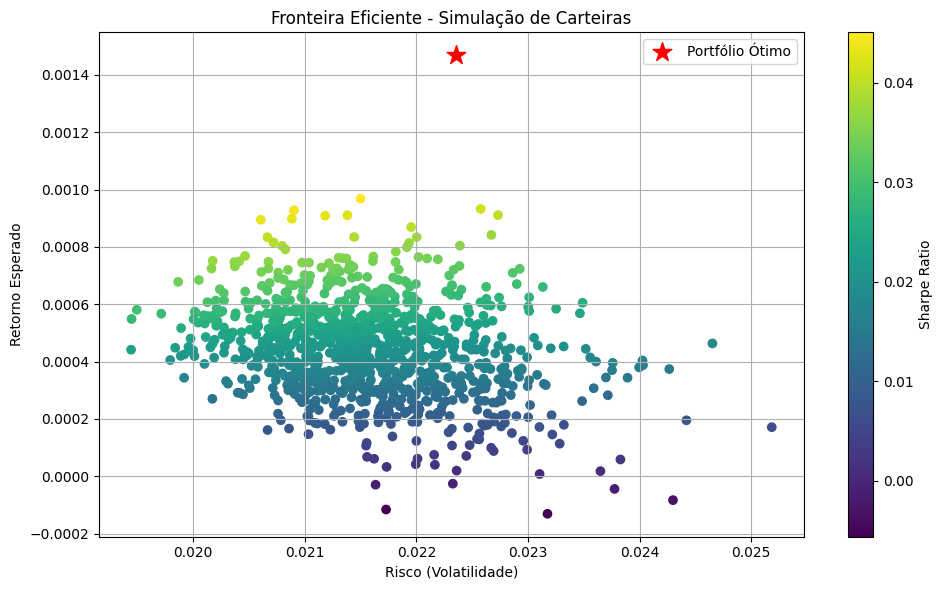

In [30]:
from outputs.charts.markowitz_plot import plot_efficient_frontier


plot_efficient_frontier(mean_returns, cov_matrix, optimized_weights=weights_sharpe)

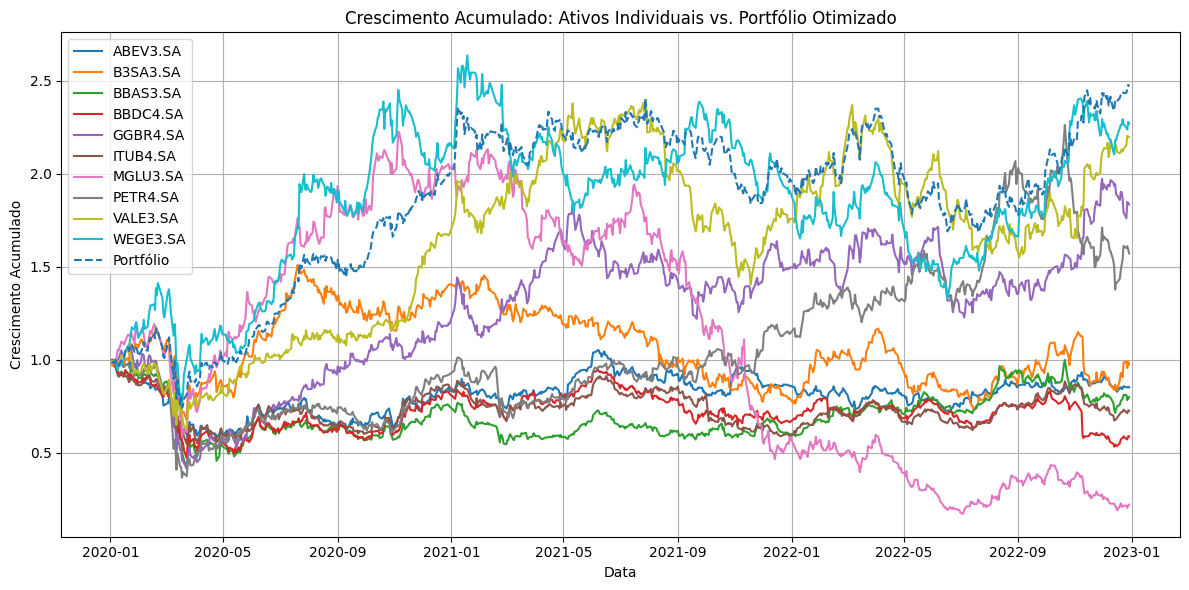

In [31]:
from outputs.charts.markowitz_plot import plot_time_serie


plot_time_serie(daily_returns, optimized_weights=weights_sharpe)